<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/randomterrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Terrain Generator

## Inevitable Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt


## Class Taken from [here](https://github.com/hnhaefliger/pyTerrain/blob/master/perlin.py)

In [0]:
import math, random

class noise:
    def lerp(self, a0, a1, w):
        return a0 + w * (a1 - a0)

    def dotGridGradient(self, ix, iy, x, y):
        dx = x - ix
        dy = y - iy
        return dx * self.gradients[iy][ix][0] + dy * self.gradients[iy][ix][1]

    def __init__(self, x, y):
        x, y = math.ceil(x) + 1, math.ceil(y) + 1
        self.gradients = []
        for j in range(y):
            self.gradients.append([])
            for i in range(x):
                a = random.uniform(0, 1)
                b = math.sqrt(1 - a ** 2)
                c = [-1, 1][random.randint(0,1)]
                d = [-1, 1][random.randint(0,1)]
                self.gradients[j].append([a * c, b * d])

    def perlin(self, x, y):
        x0 = int(x)
        x1 = x0 + 1
        y0 = int(y)
        y1 = y0 + 1
        
        sx = x - x0
        sy = y - y0

        n0 = self.dotGridGradient(x0, y0, x, y)
        n1 = self.dotGridGradient(x1, y0, x, y)
        ix0 = self.lerp(n0, n1, sx)

        n0 = self.dotGridGradient(x0, y1, x, y)
        n1 = self.dotGridGradient(x1, y1, x, y)
        ix1 = self.lerp(n0, n1, sx)

        value = self.lerp(ix0, ix1, sy)
        return value



https://medium.com/quick-code/generating-random-3d-terrain-with-python-c344ae16e5c1



In [0]:
width = 10
length = 10

mynoise = noise(width + 1, length + 1)
frequency = 30
amplitude = 20

n1div = 30 # landmass distribution
n2div = 4 # boulder distribution
n3div = 1 # rock distribution

n1scale = 20 # landmass height
n2scale = 2 # boulder scale
n3scale = 1 # rock scale

noise1 = noise(width / n1div, length / n1div) # landmass / mountains
noise2 = noise(width / n2div, length / n2div) # boulders
noise3 = noise(width / n3div, length / n3div) # rocks

In [92]:
def getTerrainAll(width, length):
    zroot = 2
    zpower = 2.5
    result = []
    for y in range(-int(length/2), int(length/2)):
        row = []
        for x in range(-int(width/2), int(width/2)):
            x1 = x + width/2 
            y1 = y + length/2
            z = noise1.perlin(x1 / n1div, y1 / n1div) * n1scale # add landmass
            z += noise2.perlin(x1 / n2div, y1 / n2div) * n2scale # add boulders
            z += noise3.perlin(x1 / n3div, y1 / n3div) * n3scale # add rocks
            if z >= 0:
                z = -math.sqrt(z)
            else:
                z = ((-z) ** (1 / zroot)) ** zpower
            #row.append([x, y, z]) 
            row.append(z)
        result.append(row)
    return result

terrain = getTerrainAll(width, length)
for _ in terrain:
  print(_)


[-0.0, 0.4895101572774414, 0.6750412548519626, 0.4169256677216218, -0.36889860563945387, -0.5905050688740765, -0.6597488207054611, -0.6291287558294715, -0.4798955004309336, -0.42743673950240074]
[0.2753015535250635, 0.8093628330547706, 1.0334137892440503, 0.8805623702543589, 0.39346169150333427, 0.0316349382742682, -0.5513611712775087, -0.7919508089217583, -0.9520744095893002, -0.8857908329747329]
[0.4291609097595052, 0.8441483791452642, 1.032545074978178, 0.9581786989743808, 0.6341014291389503, 0.2233244745748074, -0.36050321532782775, -0.7742817723763946, -1.0522571230651128, -0.9658981712165303]
[0.3745541526763826, 0.5852225765859171, 0.6726485352352417, 0.6244274247919434, 0.447107743030733, 0.28484202898445643, 0.04714192877694173, -0.5592687451119102, -0.9125227702765648, -0.7922776018596909]
[0.13293553961488375, 0.1163060560652365, 0.08053311295836495, 0.031149782889630176, -0.1843571524121596, 0.18335419646991039, 0.26576113779037863, 0.16188594861266778, -0.28775673943568786

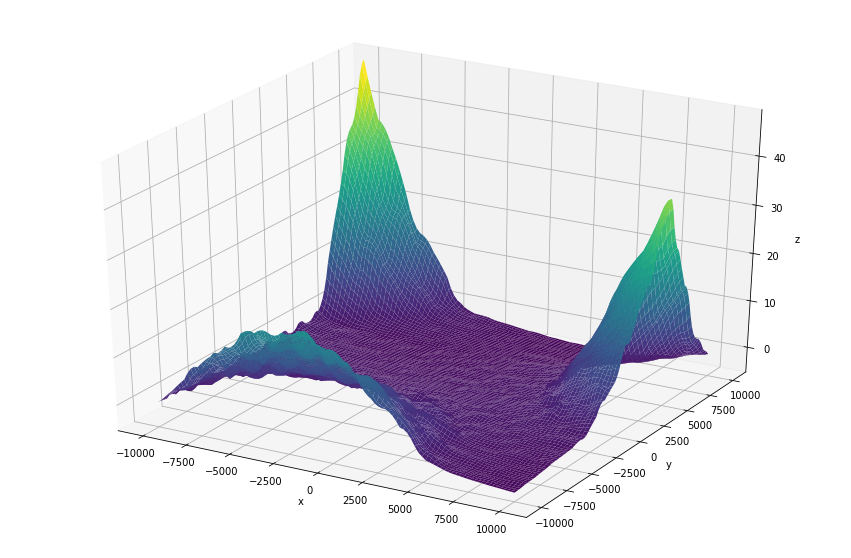

In [236]:
import numpy as np

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

def getTerrain(X, Y, ndiv = [30, 4, 1], nscale = [10, 2, 1]):
    zroot = 2
    zpower = 2.5
    width = len(X[0])
    length = len(X)

    n1div = ndiv[0]#30 # landmass distribution
    n2div = ndiv[1]#4 # boulder distribution
    n3div = ndiv[2]#1 # rock distribution

    n1scale = nscale[0]#20 # landmass height
    n2scale = nscale[1]#2 # boulder scale
    n3scale = nscale[2]#1 # rock scale

    noise1 = noise(width / n1div, length / n1div) # landmass / mountains
    noise2 = noise(width / n2div, length / n2div) # boulders
    noise3 = noise(width / n3div, length / n3div) # rocks  

    result = []
    for row in range(length):
        resultRow = []
        for column in range(width):
            x1 = column#X[row, column]
            y1 = row#Y[row, column]#y + length/2
            z = noise1.perlin(x1 / n1div, y1 / n1div) * n1scale # add landmass
            z += noise2.perlin(x1 / n2div, y1 / n2div) * n2scale # add boulders
            z += noise3.perlin(x1 / n3div, y1 / n3div) * n3scale # add rocks
            if z >= 0:
                z = -math.sqrt(z)
            else:
                z = ((-z) ** (1 / zroot)) ** zpower
            #row.append([x, y, z]) 
            resultRow.append(z)
        result.append(np.array(resultRow))
    return np.array(result)


x = np.linspace(-10000, 10000, 100)
y = np.linspace(-10000, 10000, 100)

X, Y = np.meshgrid(x, y)
#Z = f(X, Y)
Z = getTerrain(X, Y, ndiv = [75, 4, 1], nscale = [50, 2, 1])

#for item in Z:
#  print(item)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50)#, cmap='binary')
#ax.plot_surface(X, Y, Z, 50)#, cmap='binary')
ax.plot_surface(X, Y, Z, 
  rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
#ax.view_init(60, 35)


In [97]:
import json
data = {'x': X.tolist(), 'y': Y.tolist(), 'z': Z.tolist()}
print("{'x': ", json.dumps(X.tolist()),", ")
print("'y': ", json.dumps(Y.tolist()),", ")
print("'z': ", json.dumps(Z.tolist()),"}")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [95]:
c = 2 * random.randint(0,1) - 1
print(c)

1


https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [185]:
from random import random as rnd
plt.rcParams["figure.figsize"] = (15,10)

def getH(smoothness, depth):
  sign = -1
  if rnd() > 0.5:
    sign = 1
  red = 2 ** (-smoothness * depth)
  return sign * red * rnd()

def diamonAndSquare(rows, getH):
  rowsIter = iter(rows)
  previousRow = next(rowsIter)
  previousResult = None
  for currentRow in rowsIter:
    leftTop = previousRow[0]
    leftBottom = currentRow[0]
    newPreviousRow = []
    newNewRow = []

    highLimit = len(currentRow) - 1
    for index in range(1, highLimit + 1):
      resultIndex = 2 * index
      rightTop = previousRow[index]
      rightBottom = currentRow[index]

      middle = (leftTop + leftBottom + rightTop + rightBottom) / 4 + getH()

      leftMiddle = 0
      if index > 1:
        leftMiddle = (leftTop + leftBottom + middle + newNewRow[-1]) / 4 + getH()
      else:
        leftMiddle = (leftTop + leftBottom + middle) / 3 + getH()

      if (previousResult is None):
        middleTop = (leftTop + rightTop + middle) / 3 + getH()
      else:
        middleTop = (leftTop + rightTop + middle + previousResult[resultIndex - 1]) / 4 + getH()

      newPreviousRow.append(leftTop)
      newPreviousRow.append(middleTop)

      newNewRow.append(leftMiddle)
      newNewRow.append(middle)
      if index == highLimit:
        rightMiddle = (rightTop + rightBottom + middle) / 3 + getH()
        newNewRow.append(rightMiddle)

      leftTop = rightTop
      leftBottom = rightBottom

    newPreviousRow.append(previousRow[-1])
    yield newPreviousRow
    yield newNewRow
    previousResult = newNewRow
    previousRow = currentRow
    
  # last row
  lastRow = []
  highLimit = len(previousRow) - 1
  for index in range(1, highLimit + 1):
    resultIndex = 2 * index
    leftLast = previousRow[index - 1]
    rightLast = previousRow[index]
    top = previousResult[resultIndex - 1]
    #print('last top', top)
    lastRow.append(leftLast)
    
    
    #print('last top', leftLast, rightLast, top, previousResult)
    middle = (leftLast + rightLast + top) / 3 + getH()

    lastRow.append(middle)

  lastRow.append(previousRow[-1])
  yield lastRow

data = [[-1, 0, 1], [0, 0, 0], [1, 0, -1]]
data = [[0, 0], [144, 0]]

myH = lambda : 0
improvedData = list(diamonAndSquare(data, myH))
#improvedData = diamonAndSquare(improvedData, myH)
print(improvedData)

[[0, 12.0, 0], [60.0, 36.0, 12.0], [144, 60.0, 0]]


In [199]:
def dataTest(data):
  dim = len(data)
  for i in range(1, dim - 1):
    for j in range(1, dim - 1):
      if (j % 2) == 1:
        if i % 2 == 1:
          middleSum = data[i - 1][j - 1] + \
          data[i - 1][j + 1] + \
          data[i + 1][j - 1] + \
          data[i + 1][j + 1]
          middle = middleSum / 4
          if not(data[i][j] == middle):
            #print(data[i][j], '<>', middle, 'at', i, j)
            pass
        else:
          middleSum = data[i][j - 1] + \
          data[i][j + 1] + \
          data[i + 1][j] + \
          data[i - 1][j]
          middle = middleSum / 4
          if not(data[i][j] == middle):
            #print(data[i][j], '<>', middle, 'at', i, j)
            pass

data = [[0, 12.0, 0], [60.0, 36.0, 12.0], [144, 60.0, 0]]
data = [[0, 0, 0], [0, 144, 0], [0, 0, 0]]
myH = lambda : 0
improvedData = list(diamonAndSquare(data, myH))
improvedData = list(diamonAndSquare(improvedData, myH))
dataTest(improvedData)


[0, 9.0, 12.0, 12.5, 0, 12.5, 12.0, 9.0, 0]
[9.0, 15.0, 22.125, 25.5, 26.25, 25.5, 22.125, 15.0, 9.0]
[12.0, 22.125, 36.0, 46.875, 54.0, 46.875, 36.0, 22.125, 12.0]
[12.5, 25.5, 46.875, 72.0, 85.5, 72.0, 46.875, 25.5, 12.5]
[0, 26.25, 54.0, 85.5, 144, 85.5, 54.0, 26.25, 0]
[12.5, 25.5, 46.875, 72.0, 85.5, 72.0, 46.875, 25.5, 12.5]
[12.0, 22.125, 36.0, 46.875, 54.0, 46.875, 36.0, 22.125, 12.0]
[9.0, 15.0, 22.125, 25.5, 26.25, 25.5, 22.125, 15.0, 9.0]
[0, 9.0, 12.0, 12.5, 0, 12.5, 12.0, 9.0, 0]


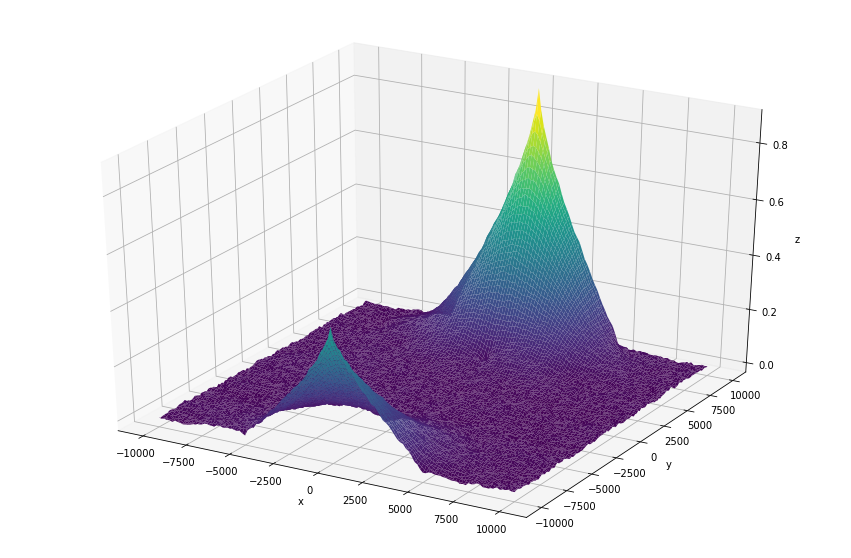

In [213]:
data = [[10 * rnd(), 10 * rnd()], [10 * rnd(), 10 * rnd()]]
data = [[-10, 0, 10], [0, 0, 0], [10, 0, -10]]
data = [[0, 0, 0], [0, 0, 0], [1, 0, 0]]
data = [[0, 0], [1, 0]]
data = [[0, rnd(), 0], [0, 0, 0], [0, 0, rnd()]]
data = [[0, 0, rnd(), 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, rnd(), 0, 0]]

improvedData = list(data)
for level in range(1, 6):
  myGetH = lambda : getH(smoothness = 1.5, depth = level)
  improvedData = diamonAndSquare(improvedData, myGetH)

improvedData = list(improvedData)
size = len(improvedData)

dataTest(improvedData)

x = np.linspace(-10000, 10000, size)
y = np.linspace(-10000, 10000, size)

X, Y = np.meshgrid(x, y)
Z = np.array(improvedData)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50)#, cmap='binary')
#ax.plot_surface(X, Y, Z, 50)#, cmap='binary')
ax.plot_surface(X, Y, Z, 
  rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
#ax.view_init(60, 35)

In [0]:
def diamonAndSquare(rows, getH):
  rowsIter = iter(rows)
  previousRow = next(rowsIter)
  previousResult = None
  for currentRow in rowsIter:
    leftTop = previousRow[0]
    leftBottom = currentRow[0]
    newPreviousRow = []
    newNewRow = []

    highLimit = len(currentRow) - 1
    for index in range(1, highLimit + 1):
      resultIndex = 2 * index
      rightTop = previousRow[index]
      rightBottom = currentRow[index]

      middle = (leftTop + leftBottom + rightTop + rightBottom) / 4 + getH()

      if (previousResult is None):
        middleTop = (leftTop + rightTop + middle) / 3 + getH()
      else:
        middleTop = (leftTop + rightTop + middle + previousResult[resultIndex - 1]) / 4 + getH()

      newPreviousRow.append(leftTop)
      newPreviousRow.append(middleTop)
      if index == highLimit:
        newPreviousRow.append(previousRow[-1])

      leftMiddle = 0
      if index > 1:
        leftMiddle = (leftTop + leftBottom + middle + newNewRow[-1]) / 4 + getH()
      else:
        leftMiddle = (leftTop + leftBottom + middle) / 3 + getH()

      newNewRow.append(leftMiddle)
      newNewRow.append(middle)
      if index == highLimit:
        rightMiddle = (rightTop + rightBottom + middle) / 3 + getH()
        newNewRow.append(rightMiddle)

      leftTop = rightTop
      leftBottom = rightBottom

    yield newPreviousRow
    yield newNewRow
    previousResult = newNewRow
    previousRow = currentRow
    
  # last row
  lastRow = []
  highLimit = len(previousRow) - 1
  for index in range(1, highLimit + 1):
    resultIndex = 2 * index
    leftLast = previousRow[index - 1]
    rightLast = previousRow[index]
    top = previousResult[resultIndex - 1]

    middle = (leftLast + rightLast + top) / 3 + getH()

    lastRow.append(leftLast)
    lastRow.append(middle)

  lastRow.append(previousRow[-1])
  yield lastRow


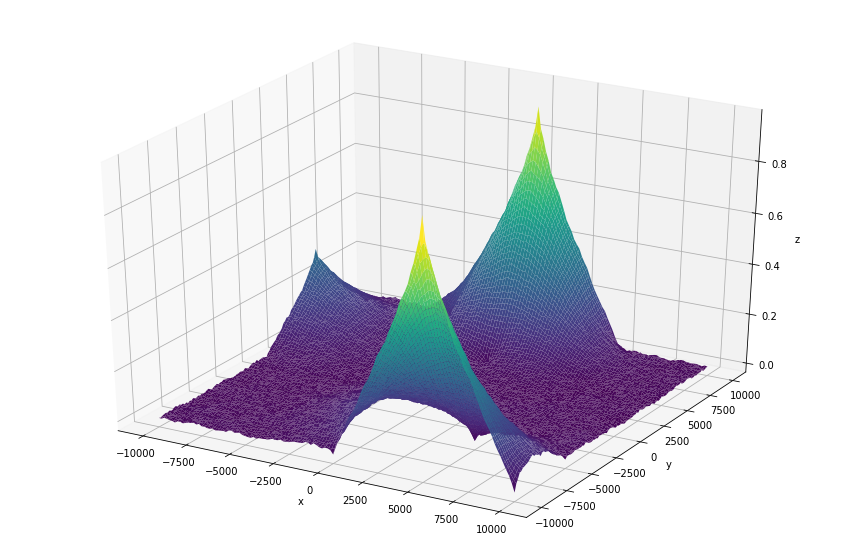

In [223]:
data = [[0, 0, rnd(), 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, rnd(), 0, 0]]
data = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
for i in range(4):
  x = random.randint(0, 4)
  y = random.randint(0, 4)
  data[x][y] = rnd()

improvedData = list(data)
for level in range(1, 6):
  myGetH = lambda : getH(smoothness = 1.5, depth = level)
  improvedData = diamonAndSquare(improvedData, myGetH)

improvedData = list(improvedData)
size = len(improvedData)

dataTest(improvedData)

x = np.linspace(-10000, 10000, size)
y = np.linspace(-10000, 10000, size)

X, Y = np.meshgrid(x, y)
Z = np.array(improvedData)

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50)#, cmap='binary')
#ax.plot_surface(X, Y, Z, 50)#, cmap='binary')
ax.plot_surface(X, Y, Z, 
  rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');